In [1]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#global anomalies Australia
aus_sum = pd.read_csv('../data/cleaned/australia_extreme_summary.csv')
aus_sum = aus_sum[aus_sum['Year']>1959]
cols = ['avg_temp', 'max_temp', 'min_temp', 'rainfall_anom']
aus_sum = aus_sum[['Year', 'avg_temp', 'max_temp', 'min_temp', 'rainfall_anom']].\
    reset_index(drop=True)
aus_sum.head()

,Year,avg_temp,max_temp,min_temp,rainfall_anom
0,1960,-0.66,-0.70,-0.63,-7.64
1,1961,0.05,0.29,-0.21,-129.90
2,1962,-0.11,-0.08,-0.16,-29.61
3,1963,-0.13,-0.32,0.04,9.55
4,1964,-0.22,-0.21,-0.23,-40.04


In [13]:
co2_cap1 = pd.read_csv('../data/raw/co2_per_capita.csv',skiprows=4)
co2_cap2 = co2_cap1.iloc[:,4:].T
co2_cap1 = co2_cap1[['Country Name','Country Code']]
co2_cap2.columns = co2_cap1['Country Name'].to_list()
co2_fin = co2_cap2.reset_index().rename({'index':'Year'},axis=1)
co2_fin.head()

,Year,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,204.620372,0.046057,0.100835,1.258195,NaN,0.607448,0.119035,2.383343,NaN,...,NaN,0.181947,NaN,3.045939,0.135028,NaN,0.011038,5.727221,NaN,NaN
1,1961,208.822811,0.053589,0.082204,1.374186,NaN,0.660638,0.109141,2.458551,NaN,...,NaN,0.183099,NaN,2.992537,0.163552,NaN,0.013599,5.832621,NaN,NaN
2,1962,226.118079,0.073721,0.210531,1.439956,NaN,0.724944,0.163533,2.538446,NaN,...,NaN,0.217694,0.594994,3.038068,0.158366,NaN,0.012729,5.887170,NaN,NaN
3,1963,214.800370,0.074161,0.202737,1.181681,NaN,0.850567,0.175833,2.330685,NaN,...,NaN,0.196997,0.471835,3.141706,0.184026,NaN,0.014518,5.961336,NaN,NaN
4,1964,207.615777,0.086174,0.213560,1.111742,NaN,0.969476,0.132825,2.553442,NaN,...,NaN,0.209870,0.864439,3.241921,0.208112,NaN,0.017550,6.332342,0.946606,1.034903


In [20]:
co2_aus = co2_fin.loc[:60,['Year','Australia']]
co2_aus['Year'] = co2_aus['Year'].astype('int')
fin = co2_aus.merge(aus_sum,on='Year',how='left')
fin.head()

,Year,Australia,avg_temp,max_temp,min_temp,rainfall_anom
0,1960,8.582937,-0.66,-0.70,-0.63,-7.64
1,1961,8.641569,0.05,0.29,-0.21,-129.90
2,1962,8.835688,-0.11,-0.08,-0.16,-29.61
3,1963,9.226440,-0.13,-0.32,0.04,9.55
4,1964,9.759073,-0.22,-0.21,-0.23,-40.04


In [21]:
fin.corr()

,Year,Australia,avg_temp,max_temp,min_temp,rainfall_anom
Year,1.000000,0.889087,0.750084,0.704527,0.688675,0.102815
Australia,0.889087,1.000000,0.614141,0.539855,0.608989,0.180332
avg_temp,0.750084,0.614141,1.000000,0.940175,0.893955,-0.277778
max_temp,0.704527,0.539855,0.940175,1.000000,0.689767,-0.473528
min_temp,0.688675,0.608989,0.893955,0.689767,1.000000,0.049881
rainfall_anom,0.102815,0.180332,-0.277778,-0.473528,0.049881,1.000000


<AxesSubplot:xlabel='Year'>

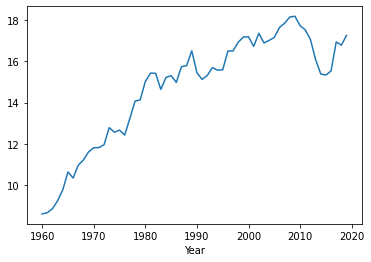

In [35]:
final = fin.set_index('Year')
final['Australia'].plot()

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
model_df = fin.dropna()
X = model_df[['Year','Australia','max_temp','min_temp']]
y = model_df['avg_temp'].to_numpy().reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

0.9988069640889344
0.9994322807234122
Mean Absolute Error: 0.007893644224875854
Mean Squared Error: 9.23404234558904e-05
Root Mean Squared Error: 0.00960939246029063


In [69]:
a = np.array([2021,17.27000,1.24,1.05]).reshape(1,-1)
model.predict(a)

array([[1.13852314]])

In [70]:
# Save the model
import joblib
filename = 'aus_anomalie_pred.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load('aus_anomalie_pred.sav')

In [71]:
fin.tail()

,Year,Australia,avg_temp,max_temp,min_temp,rainfall_anom
56,2016,15.53922,0.99,0.83,1.15,66.06
57,2017,16.95000,1.06,1.41,0.72,28.41
58,2018,16.79000,1.12,1.54,0.69,-60.19
59,2019,17.27000,1.52,2.10,0.94,-190.32
60,2020,NaN,1.15,1.24,1.05,19.43
